In [42]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing, metrics
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('jeu2Donne.csv')#importation du jeu de donnes

In [6]:
for column in ("CAS","SMILES","Set","PCD","X2Av","N-072","logBCF","B02[C-N]" ):
       df.drop([column],axis='columns',inplace=True)

In [74]:
X = df[df.columns[:-1]].values
Y_class = df['Class'].values


In [75]:
#Séparons nos données en un jeu d’entraînement et stratification. 
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X, Y_class,stratify = Y_class,
                                test_size=0.25# 25% des données dans le jeu de test
                                )

In [76]:
""""
Nous pouvons maintenant standardiser les données d’entraînement
et appliquer la même transformation aux données de test l'idée etent d'adapter le modèle aux données
"""
from sklearn.preprocessing import StandardScaler
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train)

"""
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)
print(X_test_std)
print(X_train_std)"""

[[ 0.1432349  -1.16810134  0.95982782  2.28482859 -0.77936734]
 [-0.88313546  0.79127132 -0.04325637 -0.27271854 -0.09493046]
 [-0.88313546 -1.16810134 -0.7571077  -1.06893604 -0.77936734]
 ...
 [-0.36995028 -1.16810134 -2.38173486 -1.02068044 -0.77936734]
 [-0.36995028  1.11151143 -1.08326391 -0.44161316  1.95838019]
 [-0.88313546 -1.16810134 -2.11096366 -1.35846968 -0.77936734]]


'\nstd_scale = preprocessing.StandardScaler().fit(X_train)\nX_train_std = std_scale.transform(X_train)\nX_test_std = std_scale.transform(std_scale = preprocessing.StandardScaler().fit(X_train)\nX_train_std = std_scale.transform(X_train)\nX_test_std = std_scale.transform(X_test)\nprint(X_test_std)\nprint(X_train_std)'

In [77]:
# Construction du modèle
classifier = LogisticRegression(random_state = 0, solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [78]:
#validation croisé 
validation = model_selection.cross_val_score(classifier,X,Y_class,cv=10,scoring='accuracy')
print(validation)

[0.67948718 0.69230769 0.5        0.62820513 0.70512821 0.58974359
 0.65384615 0.6025641  0.65384615 0.62337662]


In [79]:
# Prédire les étiquettes de classe pour les échantillons dans X_test puis afficher la performance
y_pred = classifier.predict(X_test)


#print(format(metrics.accuracy_score(y_test, y_pred)))


0.6153846153846154

In [80]:
# Matrice de confusion

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[97  0 18]
 [12  0  4]
 [41  0 23]]


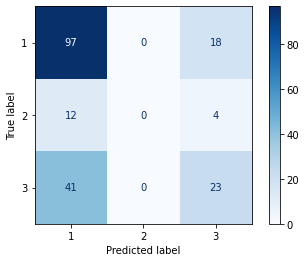

0.6153846153846154

In [84]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=[1,2,3],
                                 cmap=plt.cm.Blues)
plt.show()
classifier.score(X_test,y_test)